### Tiempos en funcion del largo del texto a desencriptar

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

import pickle

from statistics import mean

In [2]:
with open("data_pickle_all.pkl", 'rb') as pickled_file:
    data = pickle.load(pickled_file)
(rankings_freq,
rankings_markov_1,
rankings_ic,
crack_time_given_length,
avg_time_kl,
avg_time_markov_1,
avg_time_ic,
avg_time_enigma) = data


### Ranking promedio de los diferentes metodos al usar diferentes longitudes de texto

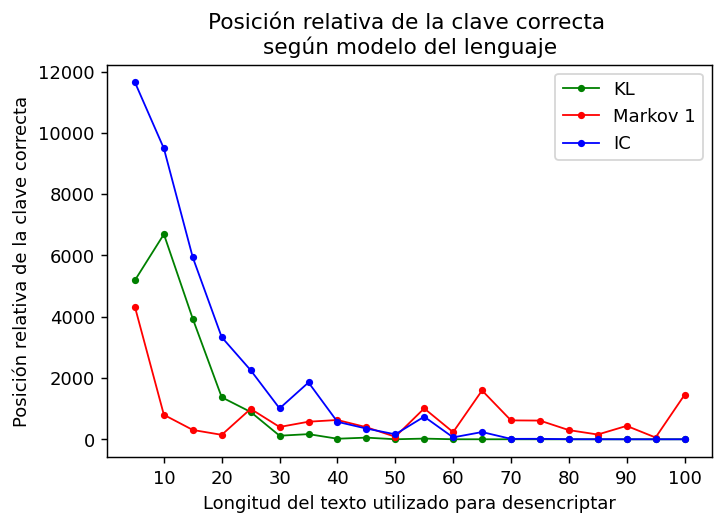

In [7]:
plt.figure(dpi = 130)
len_of_text = sorted(rankings_freq.keys())
y_rank_freq = [mean(rankings_freq[k]) for k in len_of_text]
y_rank_markov_1 = [mean(rankings_markov_1[k]) for k in len_of_text]
y_rank_ic = [mean(rankings_ic[k]) for k in len_of_text]

plt.plot(len_of_text, y_rank_freq, 'go-', linewidth = 1, markersize = 3, label = "KL")
plt.plot(len_of_text, y_rank_markov_1, 'ro-', linewidth = 1, markersize = 3, label = "Markov 1")
plt.plot(len_of_text, y_rank_ic, 'bo-', linewidth = 1, markersize = 3, label = "IC")
plt.xlabel("Longitud del texto utilizado para desencriptar")
plt.ylabel("Posición relativa de la clave correcta")
plt.title("Posición relativa de la clave correcta \nsegún modelo del lenguaje")
plt.legend()

plt.xticks(len_of_text[1::2])
plt.savefig("final_figs/language_model_length.jpg")
plt.show()

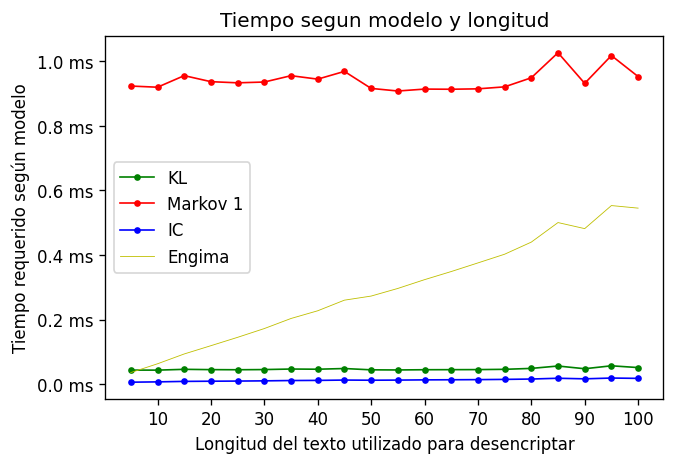

In [4]:
plt.figure(dpi = 120)
len_of_text = sorted(rankings_freq.keys())
y_time_kl = [1000*avg_time_kl[k] for k in len_of_text]
y_time_markov_1 = [1000*avg_time_markov_1[k] for k in len_of_text]
y_time_ic = [1000*avg_time_ic[k] for k in len_of_text]

y_time_enigma = [1000*avg_time_enigma[k] for k in len_of_text]

plt.plot(len_of_text, y_time_kl, 'go-', linewidth = 1, markersize = 3, label = "KL")
plt.plot(len_of_text, y_time_markov_1, 'ro-', linewidth = 1, markersize = 3, label = "Markov 1")
plt.plot(len_of_text, y_time_ic, 'bo-', linewidth = 1, markersize = 3, label = "IC")
plt.plot(len_of_text, y_time_enigma, 'y-', linewidth = 0.5, markersize = 2, label = "Engima")

plt.xlabel("Longitud del texto utilizado para desencriptar")
plt.ylabel("Tiempo requerido según modelo")
plt.title("Tiempo segun modelo y longitud")
plt.legend()
plt.xticks(len_of_text[1::2]) # Multiplos de 10


plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f ms'))

plt.show()

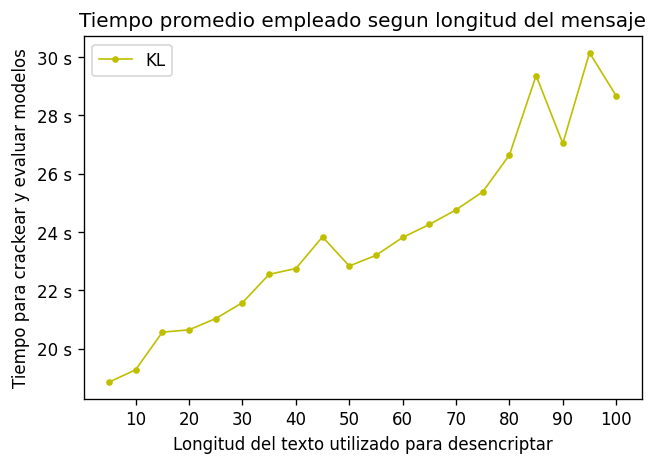

In [5]:
plt.figure(dpi = 120)
len_of_text = sorted(rankings_freq.keys())
y_time_crack = [mean(crack_time_given_length[k]) for k in len_of_text]

plt.plot(len_of_text, y_time_crack, 'yo-', linewidth = 1, markersize = 3, label = "KL")

plt.xlabel("Longitud del texto utilizado para desencriptar")
plt.ylabel("Tiempo para crackear y evaluar modelos")
plt.title("Tiempo promedio empleado segun longitud del mensaje")
plt.legend()

plt.xticks(len_of_text[1::2])

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f s'))

plt.show()